***

# **STA 141C Project Code**

***

In [2]:
# Packages Used

import pandas as pd
import numpy as np
import nltk
from bs4 import BeautifulSoup
import requests
from dash import Dash, html, Input, Output, dash_table
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from PIL import Image
from wordcloud import ImageColorGenerator

***

## **Dataset Preparation**

***

In [9]:
# Running it like this takes way too long
start = timer()

precovid = pd.read_csv("/Users/fish/Documents/STA 141C/STA 141C Project Code/precovid_reviews.csv")
postcovid = pd.read_csv('/Users/fish/Documents/STA 141C/STA 141C Project Code/postcovid_reviews.csv')

end = timer()

print("The time it took to load the entire dataset was", ((end-start)/60), "minutes.")

The time it took to load the entire dataset was 7.5161976845166665 minutes.


In [10]:
# Now we need to combine them
start = timer()

combined = pd.concat([precovid, postcovid])

reviews = combined[combined['is_open'] == 1]

end = timer()

print("The time it took to combine both datasets was", ((end - start)/60), "minutes.")

The time it took to combine both datasets was 7.271527143966667 minutes.


In [3]:
# Cuts time down by ~7 whole minutes
start = timer()
cols = ['business_id', 'name', 'is_open', 'categories', 'review_count', 'state_', 'stars']

pre = pd.read_csv("/Users/fish/Documents/STA 141C/STA 141C Project Code/precovid_reviews.csv", usecols=cols)
post = pd.read_csv("/Users/fish/Documents/STA 141C/STA 141C Project Code/postcovid_reviews.csv", usecols=cols)

# Cuts time down by more than 7 minutes

comb = pd.concat([pre, post])

rev = comb[comb['is_open'] == 1]

end = timer()

print("The time to subset the dataframe was:", (end-start), "seconds")

The time to subset the dataframe was: 57.625647318 seconds


In [12]:
# Getting the total number of observations for each dataframe

print(pre.shape)
print(post.shape)
print(rev.shape)

(5172198, 7)
(400295, 7)
(4302877, 7)


In [13]:
# Web scraping cuisines list to use as a way to filter cuisine vs establishment
categories_url = 'https://blog.yelp.com/businesses/yelp_category_list/'
header = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36'}
page = requests.get(categories_url, headers = header)

html = BeautifulSoup(page.content, 'html.parser')
uls = html.find_all('ul', class_ = None)     # get all <ul> tags
categories_html = uls[90]     # get <ul> containing the restaurant categories

# Get all categories into list format
cuisines = [li.text.split('\n', 1)[0] for li in categories_html.findAll('li')]

In [14]:
cuisines

['Afghan',
 'African',
 'Senegalese',
 'South African',
 'American (New) ',
 'American (Traditional)',
 'Arabian',
 'Argentine',
 'Armenian',
 'Asian Fusion',
 'Australian',
 'Austrian',
 'Bangladeshi',
 'Barbeque',
 'Basque ',
 'Belgian',
 'Brasseries',
 'Brazilian',
 'Breakfast & Brunch',
 'Pancakes',
 'British',
 'Buffets',
 'Bulgarian',
 'Burgers',
 'Burmese',
 'Cafes',
 'Themed Cafes',
 'Cafeteria',
 'Cajun/Creole',
 'Cambodian',
 'Caribbean',
 'Dominican',
 'Haitian',
 'Puerto Rican',
 'Trinidadian',
 'Catalan',
 'Cheesesteaks',
 'Chicken Shop',
 'Chicken Wings',
 'Chinese',
 'Cantonese',
 'Dim Sum',
 'Hainan',
 'Shanghainese',
 'Szechuan',
 'Comfort Food',
 'Creperies',
 'Cuban',
 'Czech',
 'Delis',
 'Diners',
 'Dinner Theater',
 'Eritrean',
 'Ethiopian',
 'Fast Food',
 'Filipino',
 'Fish & Chips',
 'Fondue',
 'Food Court',
 'Food Stands',
 'French',
 'Mauritius',
 'Reunion',
 'Game Meat',
 'Gastropubs',
 'Georgian',
 'German',
 'Gluten-Free',
 'Greek',
 'Guamanian',
 'Halal',
 

***

## **Most Common Cuisine Across Entire Dataset**

***

In [15]:
# Converting to just a list of the words in the category column
review_cat = reviews.categories
review_cat = reviews.categories.apply(lambda x:x.split(", "))
review_cat = review_cat.tolist()

# because it is a concated list, i flatten so that it's all just one giant list, which is the format we need for FreqDist
flatword = [item for sublist in review_cat for item in sublist if item in cuisines]

# Create a frequency distribution
fq = nltk.FreqDist(flatword)

# Take the top ten cuisines 
review_cuis = pd.DataFrame(fq.most_common(10), columns=['Cuisines', 'Number of Reviews'])

In [114]:
# Converting to just a list of the words in the category column

# Testing to see if we will receive the same output even though the data was procured in a different manner

start = timer()
revs_cat = rev.categories
revs_cat = rev.categories.apply(lambda x:x.split(", "))
revs_cat = revs_cat.tolist()

# because it is a concated list, i flatten so that it's all just one giant list, which is the format we need for FreqDist
flatword = [item for sublist in revs_cat for item in sublist if item in cuisines]

# Create a frequency distribution
fq = nltk.FreqDist(flatword)

# Take the top ten cuisines 
revs_cuis = pd.DataFrame(fq.most_common(10), columns=['Cuisines', 'Number of Reviews'])
end = timer()


In [119]:
# For wordcloud on front page

rev_cfive = pd.DataFrame(fq.most_common(100), columns = ['Cuisines', 'Number of Reviews'])
text = rev_cfive['Cuisines'].values 

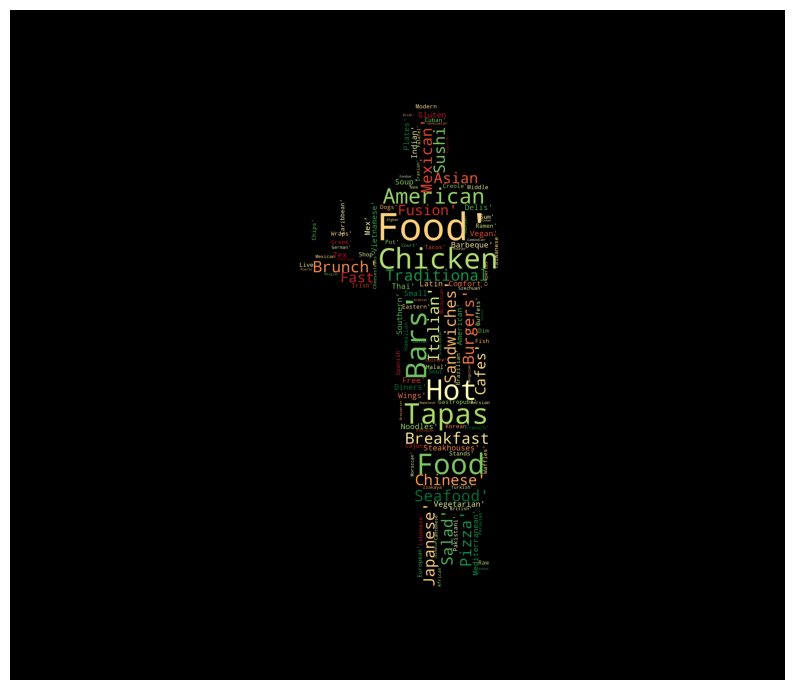

In [139]:
# Wordcloud function using a mask of a waiter holding a tray

# https://stackoverflow.com/questions/43606339/generate-word-cloud-from-single-column-pandas-dataframe
def cloud(data, mask=None):
    cloud = WordCloud(scale=4,
                      max_words=150,
                      colormap='RdYlGn',
                      mask=mask,
                      background_color='black',
                      stopwords=stopwords,
                      collocations=True).generate(str(text))
    plt.figure(figsize=(10,10))
    plt.imshow(cloud)
    plt.axis('off')
    plt.show()
    
# Use the function with the rome_corpus and our mask to create word cloud     
cloud(text, mask=np.array(Image.open("waiter.jpg")))

In [115]:
# Plot function for cuisine
def cuis_plot(df, given):
    fig = px.bar(df, x="Cuisines", y="Number of Reviews", color="Cuisines", title= given)
    fig.show()

In [28]:
cuis_plot(review_cuis, 'Most Common Cuisine Types in The Entire Dataset (Reviews)')

In [116]:
cuis_plot(revs_cuis, 'Most Common Cuisine Types in the Entire Dataset (Revs)')

From the output above, we can see that we got the same results despite using different methods to create the dataframes. This is because when we created the `revs` dataframe, we only used the column headers that we cared about. Thus, when my computer was processing each row in the dataframe, it only had to scan with the columns I had specified. Meaning, that the processing time was much more efficient compared to just including every value inside the original dataset.

We will now be using the renaming the revs frame to reviews, and renaming the reviews frame to old. We're doing this because I had written the original code before as reviews. 

In [21]:
old = reviews
reviews = rev

In [132]:
# To show you the outputs

display(old.head(1))
display(reviews.head(1))

,business_id,name,address,state_,city,postal_code,latitude,longitude,stars,review_count,...,categories,hours,review_id,user_id,customer_stars,useful,funny,cool,text_,date_
1,TA1KUSCu8GkWP9w0rmElxw,FLIP burger boutique,1587 Howell Mill Rd,GA,Atlanta,30318,33.798343,-84.415749,4.0,1909,...,"Burgers, Specialty Food, Restaurants, Barbeque...","{'Monday': '12:0-20:0', 'Tuesday': '12:0-20:0'...",Gi5LSRmTXoL9Bp4jNGPjLw,hn0ZbitvmlHnF--KJGJ6_A,4,0,0,0,I have been here twice and have had really goo...,2011-10-27 14:32:57


,business_id,name,state_,stars,review_count,is_open,categories
1,TA1KUSCu8GkWP9w0rmElxw,FLIP burger boutique,GA,4.0,1909,1,"Burgers, Specialty Food, Restaurants, Barbeque..."


In [174]:
# generating the interactive table

fig = go.Figure(data=[go.Table(
    columnwidth = [5,5],
    header=dict(values=list(review_cuis.columns),
                fill_color='teal',
                align='center'),
    cells=dict(values=[review_cuis['Cuisines'], review_cuis['Number of Reviews']],
               fill_color='lavender',
               align='center'))
])
fig.update_layout(
    title_text = "The Total Most Popular Cuisines by Reviews",
    title_font_size=30,
    title_x=0.5,
    font_family="Times New Roman",
    font_color="black",
    title_font_family="Times New Roman",
    title_font_color="black"
)
fig.update_traces(cells_font=dict(size = 12))
fig.show()

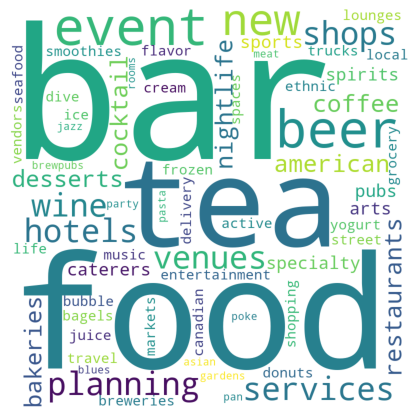

In [74]:
# Making a wordcloud for cuisine

revs_cuis_50 = pd.DataFrame(fq.most_common(50), columns=['Cuisines', 'Number of Reviews'])
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in revs_cuis_50.Cuisines:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

***

## **Most Common Establishment Type Across Entire Dataset** 

***

In [43]:
# all we have to do to get the most common establishment type, is do item not in cuisines
flatword = [item for sublist in review_cat for item in sublist if item not in cuisines]

# Create a frequency distribution
fq = nltk.FreqDist(flatword)

# Take the top ten cuisines 
review_est = pd.DataFrame(fq.most_common(10), columns=['Category', 'Number of Reviews'])

In [39]:
# Plot function for establishment type
def est_plot(df, given):
    fig = px.bar(df, x = "Category", y = "Number of Reviews", color = "Category", title = given)
    fig.show()

In [55]:
est_plot(review_est, 'The Most Common Establishment Type Across The Entire Dataset')

In [172]:
# generating the interactive table

fig = go.Figure(data=[go.Table(
    columnwidth = [5,5],
    header=dict(values=list(review_est.columns),
                fill_color='lavenderblush',
                align='center'),
    cells=dict(values=[review_est['Category'], review_est['Number of Reviews']],
               fill_color='lavender',
               align='center'))
])
fig.update_layout(
    title_text = "The Total Most Popular Categories by Reviews",
    title_font_size=30,
    title_x=0.5,
    font_family="Times New Roman",
    font_color="black",
    title_font_family="Times New Roman",
    title_font_color="black"
)
fig.update_traces(cells_font=dict(size = 12))
fig.show()

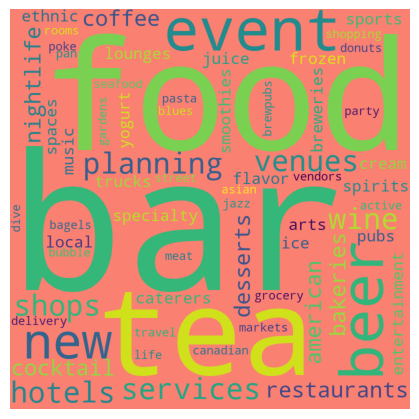

In [44]:
revs_est_50 = pd.DataFrame(fq.most_common(50), columns=['Category', 'Number of Reviews'])
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in revs_est_50.Category:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='salmon',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()
 

***

## **Multiprocessing**

***

In [ ]:
bc_reviews = reviews[(reviews['state_'] == 'BC') | (reviews['state_'] == 'ABE')]
co_reviews = reviews[reviews['state_'] == 'CO']
fl_reviews = reviews[reviews['state_'] == 'FL']
ga_reviews = reviews[reviews['state_'] == 'GA']
ma_reviews = reviews[reviews['state_'] == 'MA']
oh_reviews = reviews[reviews['state_'] == 'OH']
or_reviews = reviews[(reviews['state_'] == 'OR') | (reviews['state_'] == 'WA')]
tx_reviews = reviews[reviews['state_'] == 'TX']

In [ ]:
# Converting the reviews to csv for multiprocessing

bc_reviews.to_csv('bc_reviews.csv')
co_reviews.to_csv('co_reviews.csv')
fl_reviews.to_csv('fl_reviews.csv')
ga_reviews.to_csv('ga_reviews.csv')
ma_reviews.to_csv('ma_reviews.csv')
oh_reviews.to_csv('oh_reviews.csv')
or_reviews.to_csv('or_reviews.csv')
tx_reviews.to_csv('tx_reviews.csv')

In [ ]:
from multiprocessing import Pool
from functools import partial
import inspect

# https://stackoverflow.com/questions/47313732/jupyter-notebook-never-finishes-processing-using-multiprocessing-python-3

# We are making a tempoary file in order to call our function later for parallel computing
def parallel_task(func, iterable):
    
    with open(f'./tmp_func.py', 'w') as file:
        file.write(inspect.getsource(func).replace(func.__name__, "task"))
        
    from tmp_func import task

    if __name__ == '__main__':
        func = partial(task)
        pool = Pool(processes=101)
        res = pool.map(func, iterable)
        pool.close()
        return res
    else:
        raise "Not in Jupyter Notebook"

In [ ]:
# Multiprocessing for the Cuisines

start = timer()
frame_bank = []

def multi_norm(q):

    # Packages must recall everything as we are treating this like it is a brand new text file
    import pandas as pd
    import numpy as np
    import nltk
    from bs4 import BeautifulSoup
    import requests

    # Web scraping cuisines list to use as a way to filter cuisine vs establishment
    categories_url = 'https://blog.yelp.com/businesses/yelp_category_list/'
    header = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36'}
    page = requests.get(categories_url, headers = header)

    html = BeautifulSoup(page.content, 'html.parser')
    uls = html.find_all('ul', class_ = None)     # get all <ul> tags
    categories_html = uls[90]     # get <ul> containing the restaurant categories

    # Get all categories into list format
    cuisines = [li.text.split('\n', 1)[0] for li in categories_html.findAll('li')]

    # List of dataframes we have already subsetted that just need to be called. Making a list of strings to access
    names = ['bc_reviews.csv', 'co_reviews.csv', 'fl_reviews.csv', 'ga_reviews.csv', 'ma_reviews.csv', 'oh_reviews.csv', 'or_reviews.csv', 'tx_reviews.csv']
    
    # access the ith dataframe
    frame = pd.read_csv(names[q])
    frame_words = frame.categories
    frame_words = frame.categories.apply(lambda x: x.split(", "))
    frame_words = frame_words.tolist()

    flatword = [item for sublist in frame_words for item in sublist if item in cuisines]

    fq = nltk.FreqDist(flatword)

    cuis_frame = pd.DataFrame(fq.most_common(10), columns=['Cuisines', 'Number of Reviews'])

    return cuis_frame

for res in parallel_task(multi_norm, range(8)):
    frame_bank.append(res)

end = timer()

print("The time it took to construct all of the dataframes for cuisines was", (end - start), "seconds")

The time it took to construct all of the dataframes for cuisines was 91.081406057 seconds


In [ ]:
# Multiprocessing for category

start = timer()

cat_bank = []

def kat(q):

    # Packages must recall everything as we are treating this like it is a brand new text file
    import pandas as pd
    import numpy as np
    import nltk
    from bs4 import BeautifulSoup
    import requests

    # Web scraping cuisines list to use as a way to filter cuisine vs establishment
    categories_url = 'https://blog.yelp.com/businesses/yelp_category_list/'
    header = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36'}
    page = requests.get(categories_url, headers = header)

    html = BeautifulSoup(page.content, 'html.parser')
    uls = html.find_all('ul', class_ = None)     # get all <ul> tags
    categories_html = uls[90]     # get <ul> containing the restaurant categories

    # Get all categories into list format
    cuisines = [li.text.split('\n', 1)[0] for li in categories_html.findAll('li')]

    # List of dataframes we have already subsetted that just need to be called. Making a list of strings to access
    names = ['bc_reviews.csv', 'co_reviews.csv', 'fl_reviews.csv', 'ga_reviews.csv', 'ma_reviews.csv', 'oh_reviews.csv', 'or_reviews.csv', 'tx_reviews.csv']
    
    # access the ith dataframe
    frame = pd.read_csv(names[q])
    frame_words = frame.categories
    frame_words = frame.categories.apply(lambda x: x.split(", "))
    frame_words = frame_words.tolist()

    flatword = [item for sublist in frame_words for item in sublist if item not in cuisines]

    fq = nltk.FreqDist(flatword)

    cat_frame = pd.DataFrame(fq.most_common(10), columns=['Category', 'Number of Reviews'])

    return cat_frame

for res in parallel_task(kat, range(8)):
    cat_bank.append(res)

end = timer()

print("The time it took to construct all of the dataframes for cuisines was", (end - start), "seconds")

The time it took to construct all of the dataframes for cuisines was 145.0881863960003 seconds


In [ ]:
# Assigning the values to new vars

bc_food, co_food, fl_food, ga_food, ma_food, oh_food, or_food, tx_food = frame_bank

In [ ]:
# Assigning the values to new vars

bc_rest, co_rest, fl_rest, ga_rest, ma_rest, oh_rest, or_rest, tx_rest = cat_bank

Now that we have these frames, we're going to run it the standard manual way to see the computational time difference.

***

## **Most Common Cuisine For Each Region by Reviews | The Standard Way**

***

In [32]:
# Vancouver, BC area

# Subsetting just cuisine
bc_words = bc_reviews.categories
bc_words = bc_reviews.categories.apply(lambda x: x.split(", "))
bc_words = bc_words.tolist()

# because it is a concated list, i flatten so that it's all just one giant list, which is the format we need for FreqDist
flatword = [item for sublist in bc_words for item in sublist if item in cuisines]

# Create a frequency distribution
fq = nltk.FreqDist(flatword)

# Take the top ten cuisines 
bc_cuis = pd.DataFrame(fq.most_common(10), columns=['Cuisines', 'Number of Reviews'])

In [67]:
# Boulder, CO area

# Subsetting just cuisine
co_words = co_reviews.categories
co_words = co_reviews.categories.apply(lambda x: x.split(", "))
co_words = co_words.tolist()

# because it is a concated list, i flatten so that it's all just one giant list, which is the format we need for FreqDist
flatword = [item for sublist in co_words for item in sublist if item in cuisines]

# Create a frequency distribution
fq = nltk.FreqDist(flatword)

# Take the top ten cuisines 
co_cuis = pd.DataFrame(fq.most_common(10), columns=['Cuisines', 'Number of Reviews'])

In [68]:
# Orlando, FL area

# Subsetting just cuisine
fl_words = fl_reviews.categories
fl_words = fl_reviews.categories.apply(lambda x: x.split(", "))
fl_words = fl_words.tolist()

# because it is a concated list, i flatten so that it's all just one giant list, which is the format we need for FreqDist
flatword = [item for sublist in fl_words for item in sublist if item in cuisines]

# Create a frequency distribution
fq = nltk.FreqDist(flatword)

# Take the top ten cuisines 
fl_cuis = pd.DataFrame(fq.most_common(10), columns=['Cuisines', 'Number of Reviews'])

In [69]:
# Atlanta, GA area

# Subsetting just cuisine
ga_words = ga_reviews.categories
ga_words = ga_reviews.categories.apply(lambda x: x.split(", "))
ga_words = ga_words.tolist()

# because it is a concated list, i flatten so that it's all just one giant list, which is the format we need for FreqDist
flatword = [item for sublist in ga_words for item in sublist if item in cuisines]

# Create a frequency distribution
fq = nltk.FreqDist(flatword)

# Take the top ten cuisines 
ga_cuis = pd.DataFrame(fq.most_common(10), columns=['Cuisines', 'Number of Reviews'])

In [70]:
# Boston, MA area

# Subsetting just cuisine
ma_words = ma_reviews.categories
ma_words = ma_reviews.categories.apply(lambda x: x.split(", "))
ma_words = ma_words.tolist()

# because it is a concated list, i flatten so that it's all just one giant list, which is the format we need for FreqDist
flatword = [item for sublist in ma_words for item in sublist if item in cuisines]

# Create a frequency distribution
fq = nltk.FreqDist(flatword)

# Take the top ten cuisines 
ma_cuis = pd.DataFrame(fq.most_common(10), columns=['Cuisines', 'Number of Reviews'])

In [71]:
# Columbus, OH area

# Subsetting just cuisine
oh_words = oh_reviews.categories
oh_words = oh_reviews.categories.apply(lambda x: x.split(", "))
oh_words = oh_words.tolist()

# because it is a concated list, i flatten so that it's all just one giant list, which is the format we need for FreqDist
flatword = [item for sublist in oh_words for item in sublist if item in cuisines]

# Create a frequency distribution
fq = nltk.FreqDist(flatword)

# Take the top ten cuisines 
oh_cuis = pd.DataFrame(fq.most_common(10), columns=['Cuisines', 'Number of Reviews'])

In [72]:
# Portland, OR area

# Subsetting just cuisine
or_words = or_reviews.categories
or_words = or_reviews.categories.apply(lambda x: x.split(", "))
or_words = or_words.tolist()

# because it is a concated list, i flatten so that it's all just one giant list, which is the format we need for FreqDist
flatword = [item for sublist in or_words for item in sublist if item in cuisines]

# Create a frequency distribution
fq = nltk.FreqDist(flatword)

# Take the top ten cuisines 
or_cuis = pd.DataFrame(fq.most_common(10), columns=['Cuisines', 'Number of Reviews'])

In [73]:
# Austin, TX area

# Subsetting just cuisine
tx_words = tx_reviews.categories
tx_words = tx_reviews.categories.apply(lambda x: x.split(", "))
tx_words = tx_words.tolist()

# because it is a concated list, i flatten so that it's all just one giant list, which is the format we need for FreqDist
flatword = [item for sublist in tx_words for item in sublist if item in cuisines]

# Create a frequency distribution
fq = nltk.FreqDist(flatword)

# Take the top ten cuisines 
tx_cuis = pd.DataFrame(fq.most_common(10), columns=['Cuisines', 'Number of Reviews'])

In [175]:
cuis_plot(tx_cuis, "Texas's Most Popular Cuisines by Review")

***

## **Most Common Category For Each Region by Reviews**

***

In [74]:
# Canada

# Don't need to redo all of the defining variables because it's all the same regardless

# because it is a concated list, i flatten so that it's all just one giant list, which is the format we need for FreqDist

# the main thing is just respecifying to not in, that's all
flatword = [item for sublist in bc_words for item in sublist if item not in cuisines]

# Create a frequency distribution
fq = nltk.FreqDist(flatword)

# Take the top ten categories 
bc_est = pd.DataFrame(fq.most_common(10), columns=['Category', 'Number of Reviews'])

In [75]:
# Colorado

flatword = [item for sublist in co_words for item in sublist if item not in cuisines]

# fq dist
fq = nltk.FreqDist(flatword)

# Top ten categories
co_est = pd.DataFrame(fq.most_common(10), columns = ['Category', 'Number of Reviews'])

In [76]:
# Florida

flatword = [item for sublist in fl_words for item in sublist if item not in cuisines]

# fq dist
fq = nltk.FreqDist(flatword)

# Top ten categories
fl_est = pd.DataFrame(fq.most_common(10), columns = ['Category', 'Number of Reviews'])

In [77]:
# Georgia

flatword = [item for sublist in ga_words for item in sublist if item not in cuisines]

# fq dist
fq = nltk.FreqDist(flatword)

# Top ten categories
ga_est = pd.DataFrame(fq.most_common(10), columns = ['Category', 'Number of Reviews'])

In [78]:
# Massachusetts

flatword = [item for sublist in ma_words for item in sublist if item not in cuisines]

# fq dist
fq = nltk.FreqDist(flatword)

# Top ten categories
ma_est = pd.DataFrame(fq.most_common(10), columns = ['Category', 'Number of Reviews'])

In [79]:
# Ohio

flatword = [item for sublist in oh_words for item in sublist if item not in cuisines]

# fq dist
fq = nltk.FreqDist(flatword)

# Top ten categories
oh_est = pd.DataFrame(fq.most_common(10), columns = ['Category', 'Number of Reviews'])

In [80]:
# Oregon

flatword = [item for sublist in or_words for item in sublist if item not in cuisines]

# fq dist
fq = nltk.FreqDist(flatword)

# Top ten categories
or_est = pd.DataFrame(fq.most_common(10), columns = ['Category', 'Number of Reviews'])

In [81]:
# Texas

flatword = [item for sublist in tx_words for item in sublist if item not in cuisines]

# fq dist
fq = nltk.FreqDist(flatword)

# Top ten categories
tx_est = pd.DataFrame(fq.most_common(10), columns = ['Category', 'Number of Reviews'])

In [177]:
# Output plot

est_plot(tx_est, "Texas's Most Popular Categories by Review")

***

## **Comparing the Multiprocessing Way vs the Manual Way**

***

In [33]:
# Comparing if the dataframes are equivalent to eachother
def comp(df1, df2):
    if df1.equals(df2):
        print("The two dataframes are equal!")
    else:
        print("The two dataframes are not equal.")

comp(bc_food, bc_cuis)

The two dataframes are equal!


From the result above, we can see that are multiprocessing function gave us the same result as the manual version. We also saw that we were able to do the calculation much faster than before, as well as more efficiently. Thus, the usage of parallel computing is much better to use for every aspect of the problem.

In [185]:
# Difference between Each Region and the overall | Cuisine

# Canada
bcrcdiff = bc_food.merge(review_cuis.drop_duplicates(), on=['Cuisines'], 
                   how='left', indicator=True)

print("The number of cuisines differing between Canada and the total population is", len(bcrcdiff[bcrcdiff["_merge"]=='left_only']))

# Colorado
corcdiff = co_food.merge(review_cuis.drop_duplicates(), on=['Cuisines'], 
                   how='left', indicator=True)

print("The number of cuisines differing between Colorado and the total population is", len(corcdiff[corcdiff["_merge"]=='left_only']))

# Florida
flrcdiff = fl_food.merge(review_cuis.drop_duplicates(), on=['Cuisines'], 
                   how='left', indicator=True)

print("The number of cuisines differing between Florida and the total population is", len(flrcdiff[flrcdiff["_merge"]=='left_only']))

# Georgia
garcdiff = ga_food.merge(review_cuis.drop_duplicates(), on=['Cuisines'], 
                   how='left', indicator=True)

print("The number of cuisines differing between Georgia and the total population is", len(garcdiff[garcdiff["_merge"]=='left_only']))

# Massachusetts
marcdiff = ma_food.merge(review_cuis.drop_duplicates(), on=['Cuisines'], 
                   how='left', indicator=True)

print("The number of cuisines differing between Massachusetts and the total population is", len(marcdiff[marcdiff["_merge"]=='left_only']))

# Ohio
ohrcdiff = oh_food.merge(review_cuis.drop_duplicates(), on=['Cuisines'], 
                   how='left', indicator=True)

print("The number of cuisines differing between Ohio and the total population is", len(ohrcdiff[ohrcdiff["_merge"]=='left_only']))

# Oregon
orrcdiff = or_food.merge(review_cuis.drop_duplicates(), on=['Cuisines'], 
                   how='left', indicator=True)

print("The number of cuisines differing between Oregon and the total population is", len(orrcdiff[orrcdiff["_merge"]=='left_only']))

# Texas
txrcdiff = tx_food.merge(review_cuis.drop_duplicates(), on=['Cuisines'], 
                   how='left', indicator=True)

print("The number of cuisines differing between Texas and the total population is", len(txrcdiff[txrcdiff["_merge"]=='left_only']))


The number of cuisines differing between Canada and the total population is 3
The number of cuisines differing between Colorado and the total population is 2
The number of cuisines differing between Florida and the total population is 1
The number of cuisines differing between Georgia and the total population is 2
The number of cuisines differing between Massachusetts and the total population is 1
The number of cuisines differing between Ohio and the total population is 2
The number of cuisines differing between Oregon and the total population is 2
The number of cuisines differing between Texas and the total population is 2


In [124]:
# Comparing to see if the output matches for the category

comp(bc_rest, bc_est)

The two dataframes are equal!


In [188]:
# Difference between Each Region and the overall | Category

# Canada
bcrediff = bc_rest.merge(review_est.drop_duplicates(), on=['Category'], 
                   how='left', indicator=True)

print("The number of establishments differing between Canada and the total population is", len(bcrediff[bcrediff["_merge"]=='left_only']))

# Colorado
corediff = co_rest.merge(review_est.drop_duplicates(), on=['Category'], 
                   how='left', indicator=True)

print("The number of establishments differing between Colorado and the total population is", len(corediff[corediff["_merge"]=='left_only']))

# Florida
flrediff = fl_rest.merge(review_est.drop_duplicates(), on=['Category'], 
                   how='left', indicator=True)

print("The number of establishments differing between Florida and the total population is", len(flrediff[flrediff["_merge"]=='left_only']))

# Georgia
garediff = ga_rest.merge(review_est.drop_duplicates(), on=['Category'], 
                   how='left', indicator=True)

print("The number of establishments differing between Georgia and the total population is", len(garediff[garediff["_merge"]=='left_only']))

# Massachusetts
marediff = ma_rest.merge(review_est.drop_duplicates(), on=['Category'], 
                   how='left', indicator=True)

print("The number of establishments differing between Massachusetts and the total population is", len(marediff[marediff["_merge"]=='left_only']))

# Ohio
ohrediff = oh_rest.merge(review_est.drop_duplicates(), on=['Category'], 
                   how='left', indicator=True)

print("The number of establishments differing between Ohio and the total population is", len(ohrediff[ohrediff["_merge"]=='left_only']))

# Oregon
orrediff = or_rest.merge(review_est.drop_duplicates(), on=['Category'], 
                   how='left', indicator=True)

print("The number of establishments differing between Oregon and the total population is", len(orrediff[orrediff["_merge"]=='left_only']))

# Texas
txrediff = tx_rest.merge(review_est.drop_duplicates(), on=['Category'], 
                   how='left', indicator=True)

print("The number of establishments differing between Texas and the total population is", len(txrediff[txrediff["_merge"]=='left_only']))


The number of establishments differing between Canada and the total population is 2
The number of establishments differing between Colorado and the total population is 3
The number of establishments differing between Florida and the total population is 1
The number of establishments differing between Georgia and the total population is 1
The number of establishments differing between Massachusetts and the total population is 1
The number of establishments differing between Ohio and the total population is 3
The number of establishments differing between Oregon and the total population is 1
The number of establishments differing between Texas and the total population is 2


***

## **Subset to Only Reviews With 4 Stars or Above**

***

In [133]:
stars = reviews[reviews['stars'] >= 4.0]

In [136]:
stars.head(10)

,business_id,name,state_,stars,review_count,is_open,categories
1,TA1KUSCu8GkWP9w0rmElxw,FLIP burger boutique,GA,4.0,1909,1,"Burgers, Specialty Food, Restaurants, Barbeque..."
2,KXCXaF5qimmtKKqnPc_LQA,Thierry,BC,4.0,849,1,"Food, Desserts, Chocolatiers & Shops, Food Del..."
3,mOnesB4IF9j6-ZmHoOHOig,Pho Van,TX,4.0,364,1,"Vietnamese, Restaurants"
4,jMz_y_-cWMfiZF7Q5snE6Q,Ramen Danbo,BC,4.5,436,1,"Ramen, Japanese, Noodles, Restaurants"
5,tiKV9b0b2kpaGm5a-nd1ig,Ristorante Serena,MA,4.5,119,1,"Restaurants, Italian"
7,p2BkIrOuIsxGqtV0lwOZUw,Yalla,GA,4.0,291,1,"Lebanese, Restaurants, Greek, Mediterranean, M..."
10,VPqWLp9kMiZEbctCebIZUA,Medina Cafe,BC,4.0,2302,1,"Bars, Moroccan, Wine Bars, Breakfast & Brunch,..."
11,bZiIIUcpgxh8mpKMDhdqbA,Hopdoddy Burger Bar,TX,4.0,4708,1,"American (New), American (Traditional), Restau..."
14,J8Ha6yIvGoU-E31jnCq7Ew,Barley Swine,TX,4.5,1086,1,"Restaurants, Nightlife, American (New), Bars, ..."
15,YZs1gNSh_sN8JmN_nrpxeA,Terry Black's Barbecue,TX,4.5,3555,1,"Sandwiches, Barbeque, Southern, Restaurants, S..."


In [140]:
# Getting the most common cuisine for restaurants over 4 Stars

star_cuis = stars.categories
star_cuis = stars.categories.apply(lambda x:x.split(", "))
star_cuis = star_cuis.tolist()

# because it is a concated list, i flatten so that it's all just one giant list, which is the format we need for FreqDist
flatword = [item for sublist in star_cuis for item in sublist if item in cuisines]

# Create a frequency distribution
fq = nltk.FreqDist(flatword)

# Take the top ten cuisines 
star_cuis = pd.DataFrame(fq.most_common(10), columns=['Cuisines', 'Number of Reviews'])

In [143]:
# Plot

fig = go.Figure(data=[go.Table(
    header=dict(values=list(star_cuis.columns),
                fill_color='teal',
                align='center'),
    cells=dict(values=[star_cuis['Cuisines'], star_cuis['Number of Reviews']],
               fill_color='lavender',
               align='center'))
])
fig.update_layout(
    title_text = "The Most Popular Cuisine for Restaurants with at Least 4 Stars",
    title_font_size=30,
    title_x=0.5,
    font_family="Times New Roman",
    font_color="black",
    title_font_family="Times New Roman",
    title_font_color="black"
)
fig.update_traces(cells_font=dict(size = 12))
fig.show()

In [146]:
# Category now

star_e = stars.categories
star_e = stars.categories.apply(lambda x:x.split(", "))
star_e = star_e.tolist()

flatword = [item for sublist in star_e for item in sublist if item not in cuisines]

# Create a frequency distribution
fq = nltk.FreqDist(flatword)

# Take the top ten cuisines 
star_cat = pd.DataFrame(fq.most_common(10), columns=['Category', 'Number of Reviews'])

In [147]:
# Plot

fig = go.Figure(data=[go.Table(
    header=dict(values=list(star_cat.columns),
                fill_color='lavenderblush',
                align='center'),
    cells=dict(values=[star_cat['Category'], star_cat['Number of Reviews']],
               fill_color='lavender',
               align='center'))
])
fig.update_layout(
    title_text = "The Most Popular Categories for Restaurants with at Least 4 Stars",
    title_font_size=30,
    title_x=0.5,
    font_family="Times New Roman",
    font_color="black",
    title_font_family="Times New Roman",
    title_font_color="black"
)
fig.update_traces(cells_font=dict(size = 12))
fig.show()

In [149]:
# Let us compare

comp(star_cuis, review_cuis)
comp(star_cat, review_est)

The two dataframes are not equal.
The two dataframes are not equal.


In [152]:
# Using a merge function to see what is different

star_cuis.merge(review_cuis.drop_duplicates(), on=['Cuisines'], 
                   how='left', indicator=True)

,Cuisines,Number of Reviews_x,Number of Reviews_y,_merge
0,Breakfast & Brunch,479308,739158.0,both
1,American (Traditional),378790,806853.0,both
2,Sandwiches,375204,564755.0,both
3,Seafood,279596,462278.0,both
4,Italian,229470,362105.0,both
5,Pizza,215276,397756.0,both
6,Mexican,213040,389948.0,both
7,Japanese,195858,319495.0,both
8,Vegetarian,172930,NaN,left_only
9,Salad,172163,284964.0,both


In [154]:
star_cat.merge(review_est.drop_duplicates(), on = ['Category'], how = 'left', indicator=True)

,Category,Number of Reviews_x,Number of Reviews_y,_merge
0,Restaurants,2589358,4302877.0,both
1,Food,967263,1414395.0,both
2,Nightlife,750493,1279483.0,both
3,Bars,733932,1238157.0,both
4,American (New),478224,765249.0,both
5,Coffee & Tea,260964,354412.0,both
6,Cocktail Bars,220581,309954.0,both
7,Event Planning & Services,194728,335515.0,both
8,Desserts,174369,245858.0,both
9,Specialty Food,156227,NaN,left_only


***

## **Subsetting to Only do Reviews With at Most Two Stars**

***

In [22]:
star_low = reviews[reviews['stars'] <= 2.0]

In [24]:
star_low.head(10)

,business_id,name,state_,stars,review_count,is_open,categories
110,_Rrpjd7Z7isi8QFAv3kQ2g,Saxon Pub,TX,2.0,85,1,"American (New), Food, Pubs, Restaurants, Night..."
113,_Rrpjd7Z7isi8QFAv3kQ2g,Saxon Pub,TX,2.0,85,1,"American (New), Food, Pubs, Restaurants, Night..."
159,3R0TFde14zZt4LgXVYmhiQ,Hooters,GA,2.0,402,1,"Nightlife, Restaurants, American (Traditional)..."
169,H674IPLV1VTVQoytkzHShQ,Dunkin',FL,2.0,47,1,"Food, Donuts, Coffee & Tea, Restaurants"
245,v-OEtDOpGWvleZ3U0VoqBw,McDonald's,MA,1.5,18,1,"Coffee & Tea, Burgers, Restaurants, Fast Food,..."
306,VwM-QyAgE8aBI9nHszyNRg,Don Pollo Bar & Grill,GA,1.5,16,1,"Bars, Restaurants, Nightlife, Mexican"
482,3R0TFde14zZt4LgXVYmhiQ,Hooters,GA,2.0,402,1,"Nightlife, Restaurants, American (Traditional)..."
512,3R0TFde14zZt4LgXVYmhiQ,Hooters,GA,2.0,402,1,"Nightlife, Restaurants, American (Traditional)..."
553,_Rrpjd7Z7isi8QFAv3kQ2g,Saxon Pub,TX,2.0,85,1,"American (New), Food, Pubs, Restaurants, Night..."
602,s_wer9tZdJSvH8mSH5Gwcg,New Concept Hotpot,BC,2.0,6,1,"Hot Pot, Restaurants"


In [25]:
# Getting the most common cuisine for restaurants less than two Stars

star_lowc = star_low.categories
star_lowc = star_low.categories.apply(lambda x:x.split(", "))
star_lowc = star_lowc.tolist()

# because it is a concated list, i flatten so that it's all just one giant list, which is the format we need for FreqDist
flatword = [item for sublist in star_lowc for item in sublist if item in cuisines]

# Create a frequency distribution
fq = nltk.FreqDist(flatword)

# Take the top ten cuisines 
star_lows = pd.DataFrame(fq.most_common(10), columns=['Cuisines', 'Number of Reviews'])

In [26]:
# Plot

fig = go.Figure(data=[go.Table(
    header=dict(values=list(star_lows.columns),
                fill_color='teal',
                align='center'),
    cells=dict(values=[star_lows['Cuisines'], star_lows['Number of Reviews']],
               fill_color='lavender',
               align='center'))
])
fig.update_layout(
    title_text = "The Most Popular Cuisine for Restaurants with at Most 2 Stars",
    title_font_size=30,
    title_x=0.5,
    font_family="Times New Roman",
    font_color="black",
    title_font_family="Times New Roman",
    title_font_color="black"
)
fig.update_traces(cells_font=dict(size = 12))
fig.show()

In [27]:
# Category now

# because it is a concated list, i flatten so that it's all just one giant list, which is the format we need for FreqDist
flatword = [item for sublist in star_lowc for item in sublist if item not in cuisines]

# Create a frequency distribution
fq = nltk.FreqDist(flatword)

# Take the top ten cuisines 
star_low_rest = pd.DataFrame(fq.most_common(10), columns=['Category', 'Number of Reviews'])

In [34]:
# Plot

fig = go.Figure(data=[go.Table(
    header=dict(values=list(star_low_rest.columns),
                fill_color='lavenderblush',
                align='center'),
    cells=dict(values=[star_low_rest['Category'], star_low_rest['Number of Reviews']],
               fill_color='lavender',
               align='center'))
])
fig.update_layout(
    title_text = "The Most Popular Categories for Restaurants with at Most 2 Stars",
    title_font_size=30,
    title_x=0.5,
    font_family="Times New Roman",
    font_color="black",
    title_font_family="Times New Roman",
    title_font_color="black"
)
fig.update_traces(cells_font=dict(size = 12))
fig.show()

In [37]:
# Let us compare

comp(star_lows, review_cuis)
comp(star_low_rest, review_est)

The two dataframes are not equal.
The two dataframes are not equal.


In [38]:
# Using a merge function to see what is different

star_lows.merge(review_cuis.drop_duplicates(), on=['Cuisines'], 
                   how='left', indicator=True)

,Cuisines,Number of Reviews_x,Number of Reviews_y,_merge
0,Fast Food,45612,NaN,left_only
1,Burgers,33449,364958.0,both
2,American (Traditional),18662,806853.0,both
3,Chicken Wings,15556,NaN,left_only
4,Breakfast & Brunch,13503,739158.0,both
5,Pizza,12794,397756.0,both
6,Sandwiches,10662,564755.0,both
7,Mexican,10155,389948.0,both
8,Tacos,4943,NaN,left_only
9,Tex-Mex,4834,NaN,left_only


In [39]:
# Using a merge function to see what is different

star_low_rest.merge(review_est.drop_duplicates(), on=['Category'], 
                   how='left', indicator=True)

,Category,Number of Reviews_x,Number of Reviews_y,_merge
0,Restaurants,87878,4302877.0,both
1,Food,27923,1414395.0,both
2,Coffee & Tea,14672,354412.0,both
3,Nightlife,9552,1279483.0,both
4,Bars,8849,1238157.0,both
5,American (New),8451,765249.0,both
6,Sports Bars,4902,NaN,left_only
7,Ice Cream & Frozen Yogurt,3301,NaN,left_only
8,Event Planning & Services,2692,335515.0,both
9,Hotels & Travel,2151,NaN,left_only
